In [5]:
import numpy as np
import matplotlib.pyplot as plt
import glob as gb
from tqdm import *

%matplotlib inline

IndexError: too many indices for array

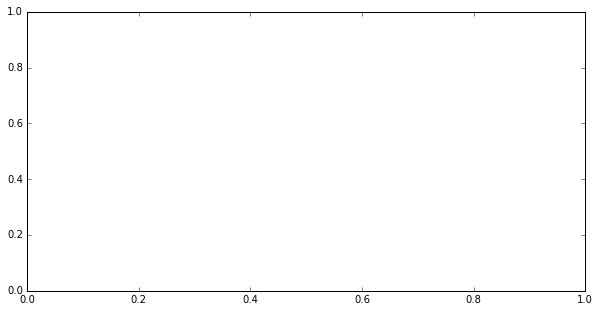

In [15]:
files = gb.glob('./Data/stabilityTest/*.txt')

# Creat plot figure
fig = plt.figure(figsize=(10.0,5.0))
ax = fig.add_subplot(111)

# Load data
# x = np.genfromtxt(fname=files[1], delimiter=' ', dtype=float, usecols=(0))
# data = np.genfromtxt(fname=files[1], delimiter=' ', dtype=float, usecols=(1))

data = np.genfromtxt(fname=files[1], delimiter=' ,', dtype=float)

x = data[:,0]
data = data[:,1]

data = data - min(data)
data = data / max(data)

ax.plot(x, data, '.-', label='Picoscope')

ax.axhline(1/np.e, color='k', linestyle='--', label='1/e')
plt.legend(loc='best', prop={'size': 14})
plt.xlabel('Time (ms)')
plt.ylabel('Intensity (A.U.)')
# plt.savefig('./Plots/histogram.png', dpi=1000)
plt.show()

In [22]:
from scipy.optimize import curve_fit


def func(t, a, tau, c):
    """ Mono-exponential decay function. t is the time."""
    return a * np.exp(-t / tau) + c


def fit_decay(t, y):
    """ Function to fit the data,y, to the mono-exponential decay."""
    # Guess initial fitting parameters
    a_guess = max(y) - min(y)
    tau_guess = 10
    c_guess =  min(y)
    # Fit curve
    popt, pcov = curve_fit(func, t, y, p0=(a_guess, tau_guess, c_guess))
    print('\nLifetime is: %.4f' % popt[1])
    return popt

In [24]:
tau = []
for f in tqdm(files):
    # Load data
    x = np.genfromtxt(fname=f, delimiter=' ', dtype=float, usecols=(0))
    data = np.genfromtxt(fname=f, delimiter=' ', dtype=float, usecols=(1))

    # Calculate lifetime
    popt = fit_decay(x, data)
    tau.append(popt[1])


Lifetime is: 10.0855

Lifetime is: 10.0892

Lifetime is: 10.0853

Lifetime is: 10.0844

Lifetime is: 10.0875

Lifetime is: 10.0917

Lifetime is: 10.0849

Lifetime is: 10.0847

Lifetime is: 10.0873

Lifetime is: 10.0869

Lifetime is: 10.0886

Lifetime is: 10.0889

Lifetime is: 10.0860

Lifetime is: 10.0852

Lifetime is: 10.0865

Lifetime is: 10.0889

Lifetime is: 10.0885

Lifetime is: 10.0860

Lifetime is: 10.0888

Lifetime is: 10.0883

Lifetime is: 10.0902

Lifetime is: 10.0874

Lifetime is: 10.0890

Lifetime is: 10.0907

Lifetime is: 10.0896

Lifetime is: 10.0865

Lifetime is: 10.0898

Lifetime is: 10.0894

Lifetime is: 10.0883

Lifetime is: 10.0876

Lifetime is: 10.0913

Lifetime is: 10.0887

Lifetime is: 10.0900

Lifetime is: 10.0857

Lifetime is: 10.0884

Lifetime is: 10.0882

Lifetime is: 10.0872

Lifetime is: 10.0854

Lifetime is: 10.0866

Lifetime is: 10.0887

Lifetime is: 10.0861

Lifetime is: 10.0859

Lifetime is: 10.0864

Lifetime is: 10.0879

Lifetime is: 10.0912

Lifetime 

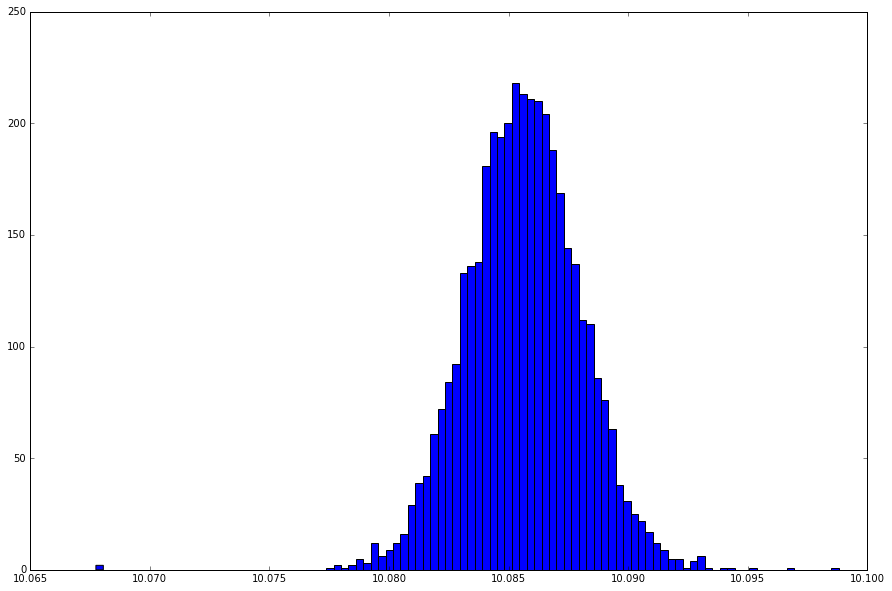

In [39]:
fig = plt.figure(figsize=(15.0,10.0))
ax = fig.add_subplot(111)
ax.hist(tau, bins=100)
plt.ticklabel_format(useOffset=False)
plt.savefig('./Data/Plots/stabilityTestHistogram.png', dpi=1000)

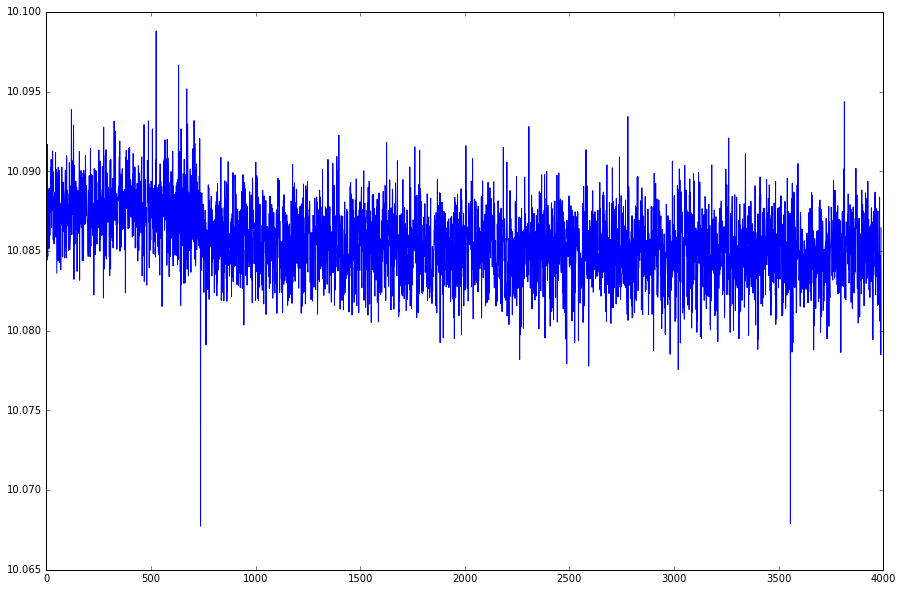

In [40]:
fig = plt.figure(figsize=(15.0,10.0))
ax = fig.add_subplot(111)
ax.plot(tau)
ax.ticklabel_format(useOffset=False)
plt.savefig('./Data/Plots/stabilityTestTime.png', dpi=1000)

In [41]:
saveData = np.c_[tau]
fname = 'Data\\fittedValues.txt'
np.savetxt(fname, saveData, newline='\r\n')